Carla Morales López
A01639225

# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The cartwheel dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


# Importing libraries

In [1216]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
#import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [1217]:
# url string that hosts our .csv file
url = "datasets/cartwheel/cartwheel.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [1218]:
print(dataset.shape)

dataset.head()


(28, 12)


,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56.0,F,1,Y,1,62.0,61.0,79,Y,1.0,7
1,2,26.0,F,1,Y,1,62.0,60.0,70,Y,1.0,8
2,3,33.0,F,1,Y,1,66.0,64.0,85,Y,1.0,7
3,4,39.0,F,1,N,0,64.0,63.0,87,Y,1.0,10
4,5,27.0,M,2,N,0,73.0,75.0,72,N,0.0,4


2. Drop rows with any missing values

In [1219]:
dataset = dataset.dropna()

print(dataset.shape)

(25, 12)


3. Encoding the class label categorical column: from string to num


In [1220]:
# Encoding the categorical column
#dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
#dataset

# Note: this is not neesary for the cartwheel dataset, but it going to be very usefull for the Iris dataset

4. Discard columns that won't be used


In [1221]:


# Drop out non necesary columns
dataset.drop(['ID', 'Age', 'Gender', 'Glasses', 'GlassesGroup', 'Height', 'Complete', 'CompleteGroup', 'Score'],axis='columns',inplace=True)

#Visualize the dataset
dataset


,GenderGroup,Wingspan,CWDistance
0,1,61.0,79
1,1,60.0,70
2,1,64.0,85
3,1,63.0,87
4,2,75.0,72
5,2,71.0,81
6,2,76.0,107
7,1,62.0,98
8,2,73.0,106
9,1,60.0,65


5. Scatter plot of the data

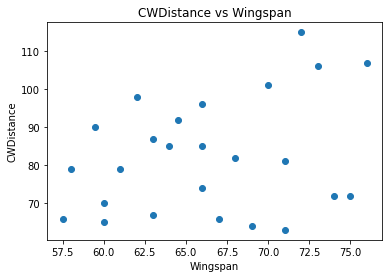

In [1222]:
plt.scatter(dataset.Wingspan,dataset.CWDistance)
plt.title('CWDistance vs Wingspan')
plt.xlabel('Wingspan')
plt.ylabel('CWDistance')
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


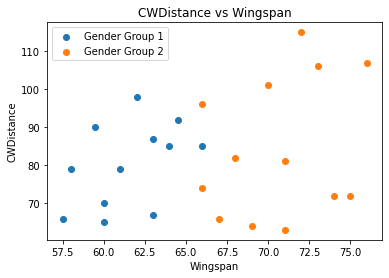

In [1223]:
df1 = dataset[dataset.GenderGroup==1]
df2 = dataset[dataset.GenderGroup==2]

plt.scatter(df1.Wingspan, df1.CWDistance, Label='Gender Group 1')
plt.scatter(df2.Wingspan, df2.CWDistance, Label='Gender Group 2')

plt.title('CWDistance vs Wingspan')
plt.xlabel('Wingspan')
plt.ylabel('CWDistance')
plt.legend()
plt.show()

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [1224]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=2)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(dataset[['Wingspan','CWDistance']])

# Print estimated cluster of each point in the dataser
yp

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0])

In [1225]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = yp

# Visualize the dataset
dataset

,GenderGroup,Wingspan,CWDistance,Cluster1
0,1,61.0,79,0
1,1,60.0,70,0
2,1,64.0,85,0
3,1,63.0,87,0
4,2,75.0,72,0
5,2,71.0,81,0
6,2,76.0,107,1
7,1,62.0,98,1
8,2,73.0,106,1
9,1,60.0,65,0


In [1226]:
# Visualize the ID of the clusters
dataset.Cluster1.unique()

array([0, 1])

In [1227]:
# Center of each cluster
km.cluster_centers_

array([[ 65.5       ,  73.94117647],
       [ 67.875     , 100.625     ]])

In [1228]:
# Sum of squared error
km.inertia_

2262.1911764705883

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


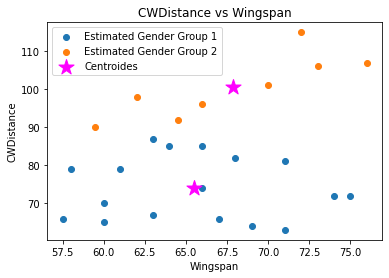

In [1229]:
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]

plt.scatter(df1.Wingspan, df1.CWDistance, Label='Estimated Gender Group 1')
plt.scatter(df2.Wingspan, df2.CWDistance, Label='Estimated Gender Group 2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('CWDistance vs Wingspan')
plt.xlabel('Wingspan')
plt.ylabel('CWDistance')
plt.legend()
plt.show()

Plot real clusters and visual comparison

C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


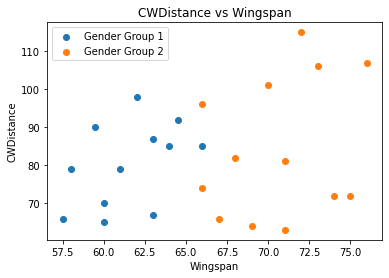

In [1230]:
df1 = dataset[dataset.GenderGroup==1]
df2 = dataset[dataset.GenderGroup==2]

plt.scatter(df1.Wingspan, df1.CWDistance, Label='Gender Group 1')
plt.scatter(df2.Wingspan, df2.CWDistance, Label='Gender Group 2')

plt.title('CWDistance vs Wingspan')
plt.xlabel('Wingspan')
plt.ylabel('CWDistance')
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [1231]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['Wingspan','CWDistance']])
    sse.append(km.inertia_)

C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


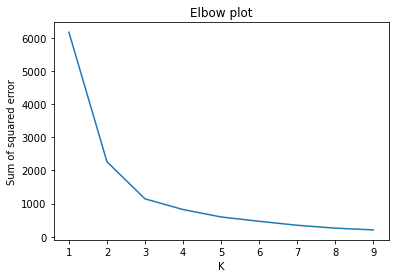

In [1232]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: work with the iris dataset

 - For the following cases, do Kmean and without using min max scaling: determine whether the scaling benefits or not
 
 - Also, compute and show the elbow plot
    
1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.

C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


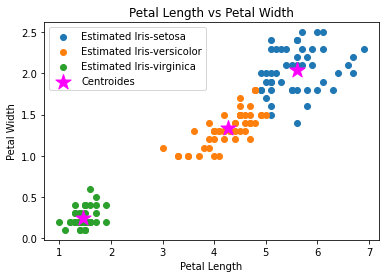

In [1233]:
url_iris = "datasets/iris/iris.csv"

dataset_iris = pd.read_csv(url_iris,header=None,names=["Sepal Length","Sepal Width","Petal Length","Petal Width","Class"])

iris_petal = dataset_iris.drop(["Sepal Length","Sepal Width"],axis="columns")


iris_petal.replace({"Class":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} },inplace=True)
km_iris = KMeans(n_clusters=3)

yp_iris = km_iris.fit_predict(iris_petal[['Petal Length','Petal Width']])

iris_petal['Clusters'] = yp_iris


dfp_setosa = iris_petal[iris_petal.Clusters==0]
dfp_virginica = iris_petal[iris_petal.Clusters==1]
dfp_versicolor = iris_petal[iris_petal.Clusters==2]


plt.scatter(dfp_setosa["Petal Length"], dfp_setosa["Petal Width"], Label='Estimated Iris-setosa')
plt.scatter(dfp_versicolor["Petal Length"], dfp_versicolor["Petal Width"], Label='Estimated Iris-versicolor')
plt.scatter(dfp_virginica["Petal Length"], dfp_virginica["Petal Width"], Label='Estimated Iris-virginica')

plt.scatter(km_iris.cluster_centers_[:,0], km_iris.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys
C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


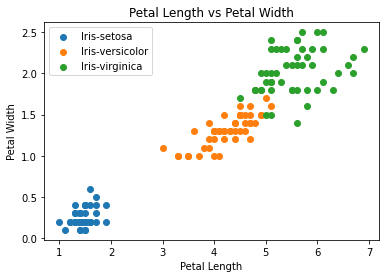

In [1234]:
dfp_setosa = iris_petal[iris_petal.Class==0]
dfp_versicolor = iris_petal[iris_petal.Class==1]
dfp_virginica = iris_petal[iris_petal.Class==2]


plt.scatter(dfp_setosa["Petal Length"], dfp_setosa["Petal Width"], Label='Iris-setosa')
plt.scatter(dfp_versicolor["Petal Length"],dfp_versicolor["Petal Width"] , Label='Iris-versicolor')
plt.scatter(dfp_virginica["Petal Length"],dfp_virginica["Petal Width"] , Label='Iris-virginica')



plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


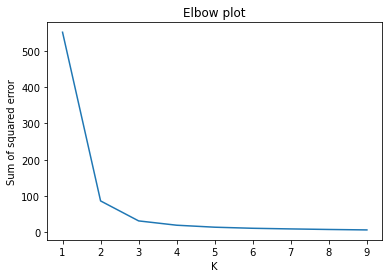

In [1235]:
sse_iris = []
k_rng_iris = range(1,10)
for k in k_rng_iris:
    km_iris = KMeans(n_clusters=k)
    km_iris.fit_predict(iris_petal[['Petal Length','Petal Width']])
    sse_iris.append(km_iris.inertia_)

plt.plot(k_rng_iris,sse_iris)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.

C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


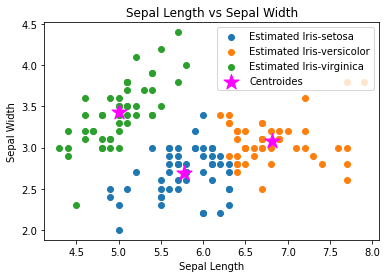

In [1236]:
iris_sepal = dataset_iris.drop(["Petal Length","Petal Width"],axis="columns")


iris_sepal.replace({"Class":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} },inplace=True)
km_iris = KMeans(n_clusters=3)

yp_iris = km_iris.fit_predict(iris_sepal[['Sepal Length','Sepal Width']])

iris_sepal['Clusters'] = yp_iris


dfs_setosa = iris_sepal[iris_sepal.Clusters==2]
dfs_virginica = iris_sepal[iris_sepal.Clusters==1]
dfs_versicolor = iris_sepal[iris_sepal.Clusters==0]


plt.scatter(dfs_setosa["Sepal Length"], dfs_setosa["Sepal Width"], Label='Estimated Iris-setosa')
plt.scatter(dfs_versicolor["Sepal Length"], dfs_versicolor["Sepal Width"], Label='Estimated Iris-versicolor')
plt.scatter(dfs_virginica["Sepal Length"], dfs_virginica["Sepal Width"], Label='Estimated Iris-virginica')

plt.scatter(km_iris.cluster_centers_[:,0], km_iris.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys
C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


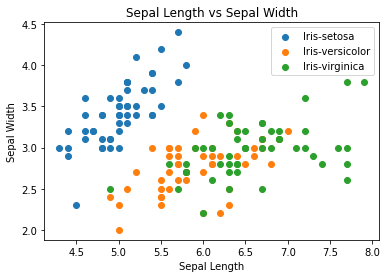

In [1237]:
dfs_setosa = iris_sepal[iris_sepal.Class==0]
dfs_versicolor = iris_sepal[iris_sepal.Class==1]
dfs_virginica = iris_sepal[iris_sepal.Class==2]


plt.scatter(dfs_setosa["Sepal Length"], dfs_setosa["Sepal Width"], Label='Iris-setosa')
plt.scatter(dfs_versicolor["Sepal Length"],dfs_versicolor["Sepal Width"] , Label='Iris-versicolor')
plt.scatter(dfs_virginica["Sepal Length"],dfs_virginica["Sepal Width"] , Label='Iris-virginica')



plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\envs\IrisDataset\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


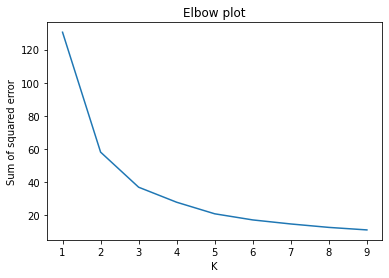

In [1238]:
sse_iris = []
k_rng_iris = range(1,10)
for k in k_rng_iris:
    km_iris = KMeans(n_clusters=k)
    km_iris.fit_predict(iris_sepal[['Sepal Length','Sepal Width']])
    sse_iris.append(km_iris.inertia_)

plt.plot(k_rng_iris,sse_iris)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()




3. **Draw conclusions:**
    - _About the scalling: does it help or not?_
    - It does help, to observe the data better because sometimes we might have a graph that has a bad ratio so with scalling, we could have a better view of it.
    - _About the elbow plot: does the K agree with the real number of clusters?_
    - Yes, it does coincide, what goes on sum of squared error is small for k equals three and that is the number of clusters we have.
    - _Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?_
    - Petal is better and Sepal is worse, our clusters in Petal are more separated in the graph which means the separation between types of flowers is more predominant because of this separation. In Sepal, versicolor and virginica are way too close together, meaning they are alike, so it's hard to determine the type.